# EDA Plastic Pollution in 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/cleaned_data/cleaned_data_2019.csv')
df.head()

,Unnamed: 0,primary_key,location_code,location,plastics_polymer,plastics_applications,total_waste,total_use
0,0,OAMOtherOther,OAM,Other OECD America,Other,Other,1.024199,1.065140
1,1,"OAMLDPE, LLDPEOther",OAM,Other OECD America,"LDPE, LLDPE",Other,0.168113,0.179820
2,2,OAMHDPEOther,OAM,Other OECD America,HDPE,Other,0.132488,0.132932
3,3,OAMPSOther,OAM,Other OECD America,PS,Other,0.061802,0.062225
4,4,OAMPVCOther,OAM,Other OECD America,PVC,Other,0.209497,0.208997


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df.describe()

,total_waste,total_use
count,9.900000e+02,985.000000
mean,3.568597e-01,0.466747
std,8.555932e-01,0.998876
min,1.200000e-08,0.000003
25%,1.525456e-02,0.024576
50%,7.757952e-02,0.122982
75%,2.654454e-01,0.412638
max,7.641577e+00,7.662625


### Exploring the data by region

In [9]:
df_region = df.groupby('location').agg({'total_waste':'sum', 'total_use':'sum'}).reset_index()


In [10]:
df_region['waste_use_ratio'] = df_region['total_waste']/ df_region['total_use']
df_region

,location,total_waste,total_use,waste_use_ratio
0,Canada,6.631845,7.538964,0.879676
1,China,65.438605,94.006099,0.696110
2,India,18.518411,29.333370,0.631309
3,Latin America,19.492385,22.863379,0.852559
4,Middle East & North Africa,16.917150,21.170417,0.799094
5,OECD Asia,12.250182,18.206888,0.672832
6,OECD EU,50.671286,63.673394,0.795800
7,OECD Non-EU,16.234798,21.370738,0.759674
8,OECD Oceania,1.892815,4.384767,0.431680
9,Other Africa,16.249045,17.851544,0.910232


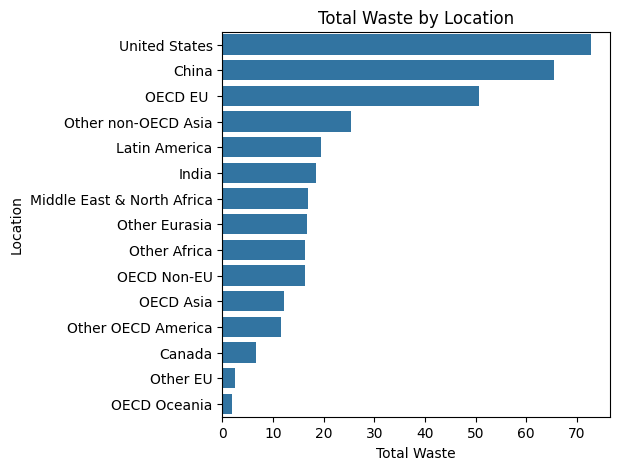

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(df_region, x='total_waste', y='location', order=df_region.sort_values('total_waste', ascending=False)['location'])
plt.xlabel('Total Waste')
plt.ylabel('Location')
plt.title('Total Waste by Location')
plt.show()

The highest amount of total waste was generated by the United States, follwed by China and the OECD EU countries.
Lowest amount is coming from OECD Oceania countries.

This values are difficult to further analyse without putting them in a wider context. It would be advantageous to learn, e.g. how many countries belong to the clustered groups and find out more how the waste was generated.

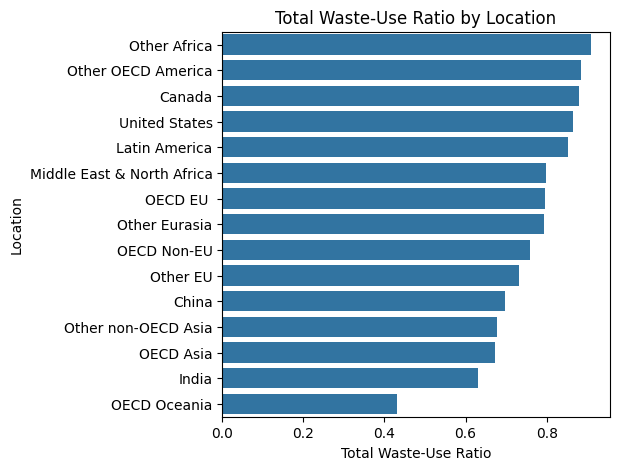

In [9]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(df_region, x='waste_use_ratio', y='location', order=df_region.sort_values('waste_use_ratio', ascending=False)['location'])
plt.xlabel('Total Waste-Use Ratio')
plt.ylabel('Location')
plt.title('Total Waste-Use Ratio by Location')
plt.show()

Most regions that use a lot of plastic also waste a lot of plastic.
Therefore, the ratio does not have a high expressive character. 
However, the regions Other Africa and Other OECD America don't have a high plastic production but still are on top of the list when looking solely on the waste-to-use ratio.
OECD Oceania has the lowest ratio with around 41%.

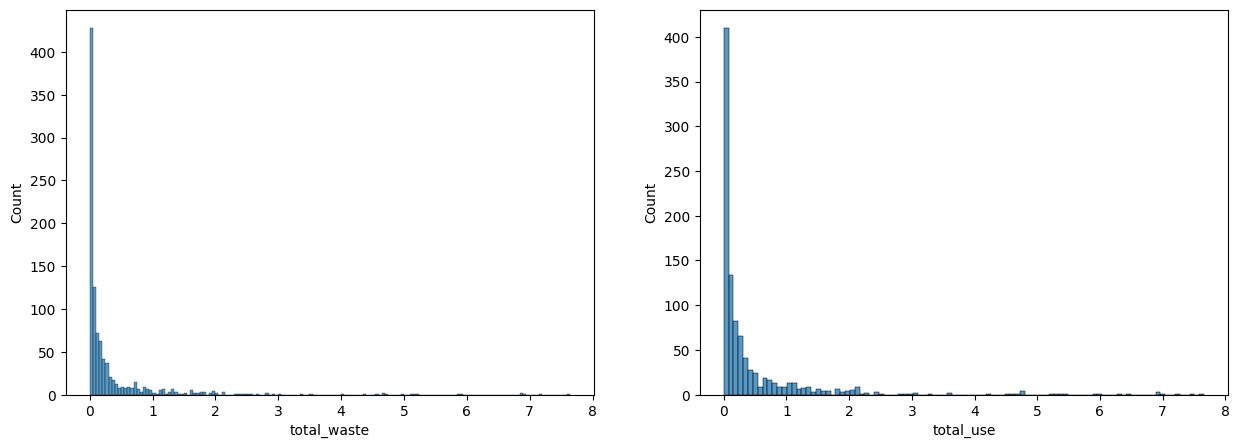

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='total_waste', ax=ax[0])
sns.histplot(df, x='total_use', ax=ax[1])
plt.show()

### Exploring the data by plastic polymer

In [13]:
df_polymer = df.groupby('plastics_polymer').agg({'total_waste':'sum', 'total_use':'sum'}).reset_index()
df_polymer['waste_use_ratio'] = df_polymer['total_waste']/ df_polymer['total_use']
df_polymer.sort_values(by='total_waste', ascending=False)

,plastics_polymer,total_waste,total_use,waste_use_ratio
9,PP,61.996107,72.804898,0.851538
7,Other,57.560130,80.960288,0.710967
3,Fibres,51.758163,60.448427,0.856237
5,"LDPE, LLDPE",49.211504,54.302586,0.906246
4,HDPE,44.711175,55.544083,0.804967
8,PET,24.813517,24.918401,0.995791
12,PVC,21.204349,51.391812,0.412602
10,PS,15.166249,21.115755,0.718243
11,PUR,11.339930,18.031958,0.628880
0,"ABS, ASA, SAN",7.279787,8.944420,0.813891


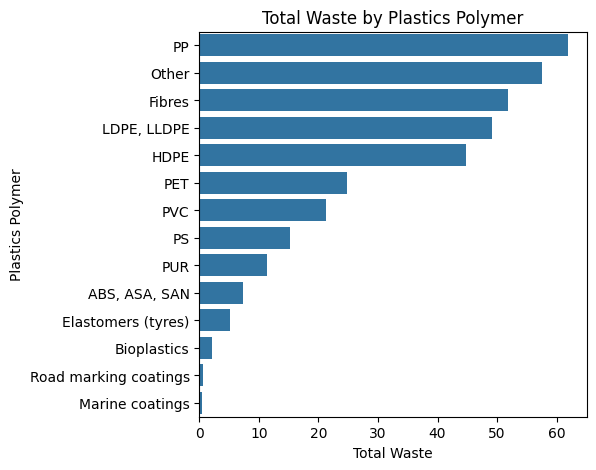

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(df_polymer, x='total_waste', y='plastics_polymer', order=df_polymer.sort_values('total_waste', ascending=False)['plastics_polymer'])
plt.xlabel('Total Waste')
plt.ylabel('Plastics Polymer')
plt.title('Total Waste by Plastics Polymer')
plt.show()

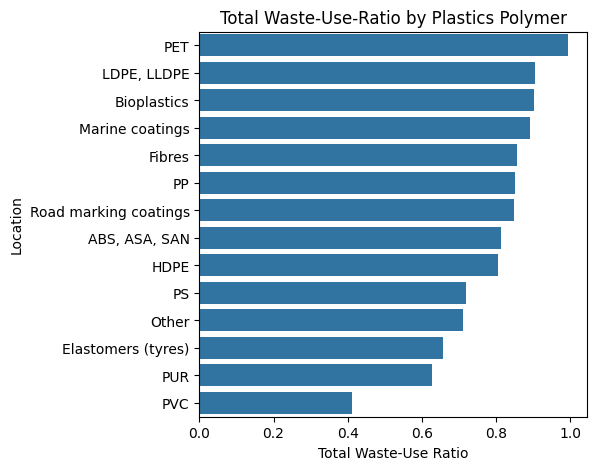

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(df_polymer, x='waste_use_ratio', y='plastics_polymer', order=df_polymer.sort_values('waste_use_ratio', ascending=False)['plastics_polymer'])
plt.xlabel('Total Waste-Use Ratio')
plt.ylabel('Location')
plt.title('Total Waste-Use-Ratio by Plastics Polymer')
plt.show()

PP, Other, Fibres, and LDPE/LLDPE are on top of the list when focusing on total plastic waste.

### Exploring the data by plastic applications

In [16]:
df_app = df.groupby('plastics_applications').agg({'total_waste':'sum', 'total_use':'sum'}).reset_index()
df_app['waste_use_ratio'] = df_app['total_waste']/ df_app['total_use']
df_app.sort_values(by='total_waste', ascending=False)

,plastics_applications,total_waste,total_use,waste_use_ratio
6,Packaging,141.959115,142.598638,0.995515
5,Other,57.766093,66.315068,0.871085
1,Consumer & institutional Products,42.574226,46.662268,0.912391
11,Transportation - other,34.577901,54.430586,0.635266
9,Textile sector - clothing,25.135282,28.758746,0.874005
0,Building & construction,16.246352,76.892713,0.211286
2,Electrical/electronics,13.939796,17.304648,0.805552
10,Textile sector - others,13.598063,15.115646,0.899602
12,Transportation - tyres,5.086058,7.734316,0.657596
3,Industrial/machinery,1.318314,2.683184,0.491324


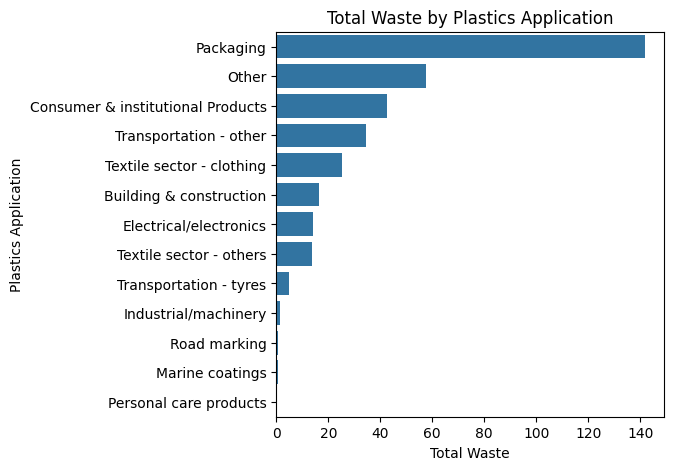

In [76]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(df_app, x='total_waste', y='plastics_applications', order=df_app.sort_values('total_waste', ascending=False)['plastics_applications'])
plt.xlabel('Total Waste')
plt.ylabel('Plastics Application')
plt.title('Total Waste by Plastics Application')
plt.show()

As the packaging industry uses a lot of plastic, it makes sense that the plastic waste is mostly comming from this industry.

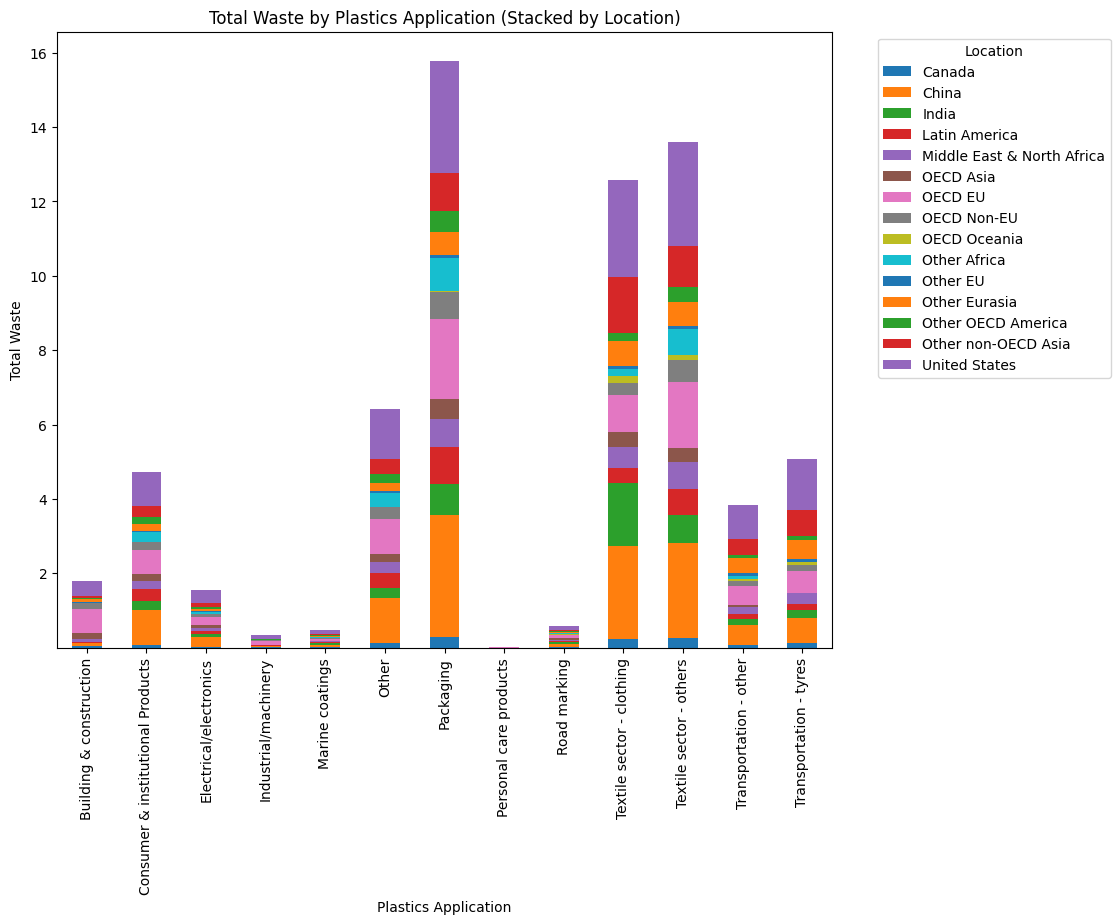

In [78]:
pivot_df = df.pivot_table(index='plastics_applications', columns='location', values='total_waste', fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Plastics Application')
plt.ylabel('Total Waste')
plt.title('Total Waste by Plastics Application (Stacked by Location)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This overview is confusing so it was decided to cluster the Regions.

In [17]:
df['location'].unique()

array(['Other OECD America', 'OECD EU ', 'OECD Non-EU', 'OECD Asia',
       'OECD Oceania', 'Latin America', 'Other EU', 'Other Eurasia',
       'Middle East & North Africa', 'Other Africa',
       'Other non-OECD Asia', 'United States', 'Canada', 'China', 'India'],
      dtype=object)

In [18]:
def location_cluster(df: pd.DataFrame) -> pd.DataFrame:
    location_dict = {
        'Latin America': ['Latin America'],
        'Europe': ['OECD EU ', 'OECD Non-EU', 'Other EU', 'Other Eurasia'],
        'Asia (excl. China and India)': ['OECD Asia', 'Other non-OECD Asia'],
        'Oceania': ['OECD Oceania'],
        'Middle East & North Africa': ['Middle East & North Africa', 'Other Africa'],
        'Americas (excl. USA)': ['Other OECD America', 'Canada'],
        'United States': ['United States'],
        'China': ['China'],
        'India': ['India']
    }

    # Mapping each country to its corresponding region cluster
    df['location_cluster'] = df['location'].map({val: key for key, values in location_dict.items() for val in values})
    pass

In [20]:
location_cluster(df)

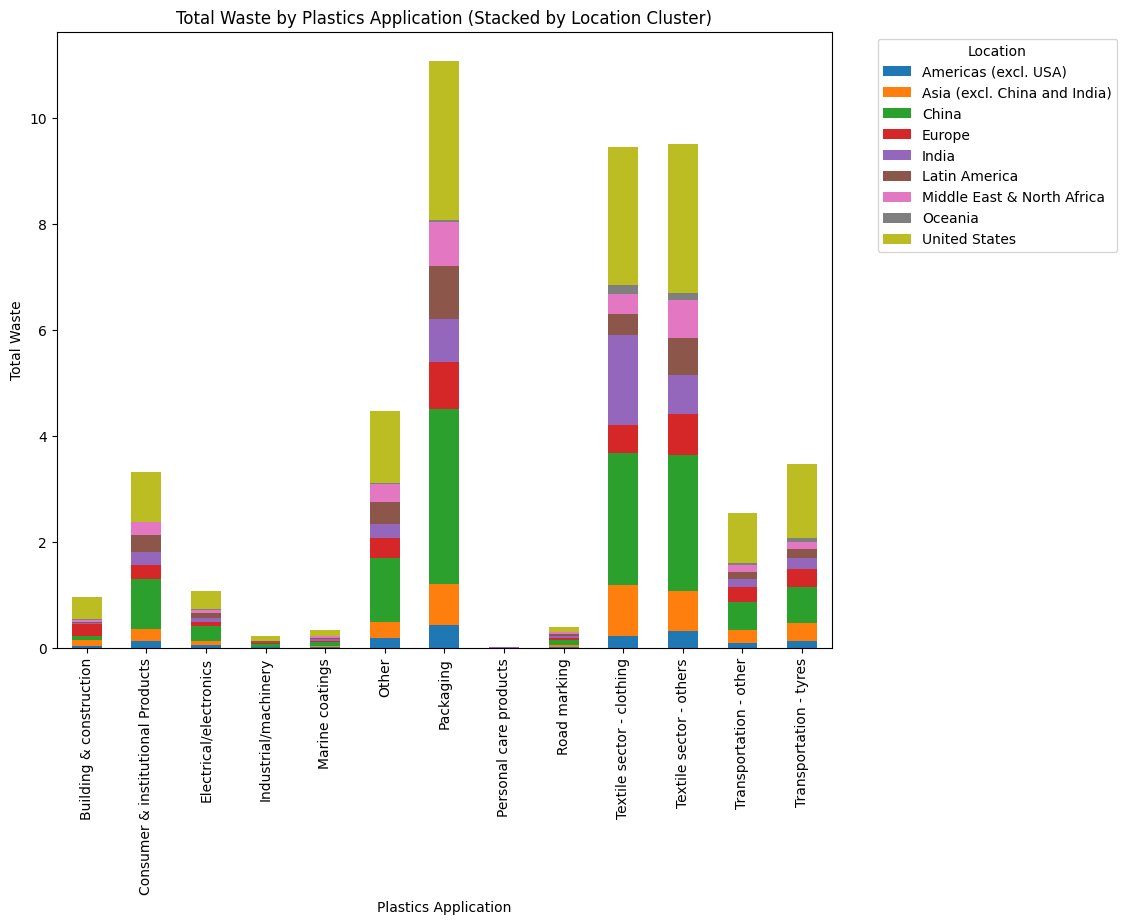

In [24]:
pivot_df = df.pivot_table(index='plastics_applications', columns='location_cluster', values='total_waste', fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
pivot_df.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Plastics Application')
plt.ylabel('Total Waste')
plt.title('Total Waste by Plastics Application (Stacked by Location Cluster)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()